In [8]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("stream_classify_preprocessing.csv", index_col=0)
data.head(10)

,STREAM_PLACEMENT_DESC,GENDER,HOMELESS,PWD,CALD,REFUGEE,AGE_GROUP,UE_GROUP,EDUCATION_ADJ
0,0,2,0,0,1,0,6,1,9
1,1,2,1,0,0,0,3,3,5
2,1,1,0,1,0,0,4,4,2
3,1,2,1,1,0,0,4,3,3
4,0,2,0,0,0,0,1,1,3
5,1,1,0,1,0,0,2,4,4
6,0,2,0,0,0,0,3,1,4
7,1,1,1,1,0,0,3,4,2
8,1,1,0,1,0,0,5,2,3
9,0,1,0,1,0,0,4,2,7


In [3]:
data_x = data[["GENDER","HOMELESS","PWD","CALD","REFUGEE","AGE_GROUP","UE_GROUP","EDUCATION_ADJ"]]
data_y = data[["STREAM_PLACEMENT_DESC"]]

In [20]:
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

print(f"Data before splitting: {len(data_x)}")
print(f"Train data: {len(x_train)}")
print(f"Validation data: {len(x_valid)}")

Data before splitting: 485972
Train data: 388777
Validation data: 97195


In [11]:
EPOCH = 15
LEARNING_RATE = 1e-3

In [22]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=EPOCH, validation_data=(x_valid, y_valid), batch_size=1024)

Epoch 1/15
380/380 [==============================] - 2s 2ms/step - loss: 0.4830 - accuracy: 0.7626 - val_loss: 0.4464 - val_accuracy: 0.7829
Epoch 2/15
380/380 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.7816 - val_loss: 0.4410 - val_accuracy: 0.7837
Epoch 3/15
380/380 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7836 - val_loss: 0.4392 - val_accuracy: 0.7847
Epoch 4/15
380/380 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.7843 - val_loss: 0.4384 - val_accuracy: 0.7853
Epoch 5/15
380/380 [==============================] - 1s 2ms/step - loss: 0.4389 - accuracy: 0.7845 - val_loss: 0.4374 - val_accuracy: 0.7854
Epoch 6/15
380/380 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.7849 - val_loss: 0.4383 - val_accuracy: 0.7843
Epoch 7/15
380/380 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.7851 - val_loss: 0.4368 - val_accuracy: 0.7858
Epoch 

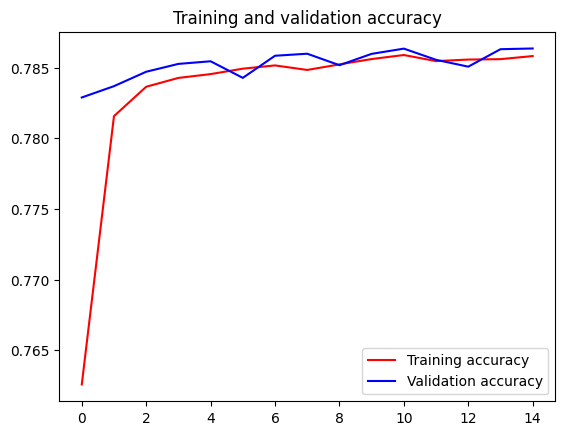

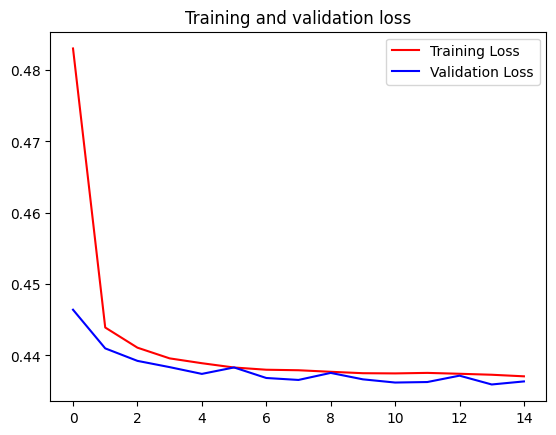

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# model.predict([[2,0,0,1,0,6,1,9]]) #0
# model.predict([[2,1,0,0,0,3,3,5]]) #harusnya 1
# model.predict([[1,0,1,0,0,4,4,2]]) #1
model.predict([[2,1,1,0,0,4,3,3]]) #1

1/1 [==============================] - 0s 38ms/step


array([[0.64649224]], dtype=float32)

In [30]:
saved_model = "model_stream_classify.h5"
model.save(saved_model)

c:\Users\vince\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
